In [3]:
import  pandas as pd
import re
from datetime import datetime

C:\Users\santh\AppData\Local\Temp\ipykernel_37428\1148153480.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import  pandas as pd


In [4]:
df = pd.read_csv("Data/cleaned_dataset/metadata_excel.csv")
df.head()

,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,discharge,[2010. 7. 21. 15. 0. ...,4,B0047,0,1,00001.csv,1.674304745,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,impedance,[2010. 7. 21. 16. 53. ...,24,B0047,1,2,00002.csv,NaN,0.056057833,0.200970166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,charge,[2010. 7. 21. 17. 25. ...,4,B0047,2,3,00003.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,impedance,[2010 7 21 20 31 5],24,B0047,3,4,00004.csv,NaN,0.053191859,0.164733999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,discharge,[2.0100e+03 7.0000e+00 2.1000e+01 2.1000e+01 2...,4,B0047,4,5,00005.csv,1.524366211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Function to convert string to datetime object
def convert_to_datetime(input_string):
    components = input_string.strip('[]').split(' ')
    components = re.split(r'\s+', input_string.strip('[]'))
    components = [float(component) if '.' in component else int(component) for component in components]
    return datetime(*map(int, components))

# Apply the function to the 'start_time' column
df['start_time'] = df['start_time'].apply(convert_to_datetime)

# df.to_excel('timestamp_updated.xlsx')

In [7]:
charge_df = df.loc[df["type"] == "charge"]
discharge_df = df.loc[df["type"] == "discharge"]
impedance_df = df.loc[df["type"] == "impedance"]


In [18]:

discharge_df = discharge_df[['start_time', 'ambient_temperature', 'battery_id', 'test_id','uid', 'filename', 'Capacity']]

discharge_df.head()

,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity
0,discharge,2010-07-21 15:00:35,4,B0047,0,1,00001.csv,1.674304745
4,discharge,2010-07-21 21:02:56,4,B0047,4,5,00005.csv,1.524366211
6,discharge,2010-07-22 01:40:06,4,B0047,6,7,00007.csv,1.508076297
8,discharge,2010-07-22 06:16:21,4,B0047,8,9,00009.csv,1.483557796
10,discharge,2010-07-22 10:51:48,4,B0047,10,11,00011.csv,1.467139167


In [41]:
#missing values

print(discharge_df.isna().sum())

# for i in discharge_df['Capacity']:
#     # if i == "[]":
#         print(i)

discharge_df = discharge_df.loc[discharge_df['Capacity']!='[]']

type                   0
start_time             0
ambient_temperature    0
battery_id             0
test_id                0
uid                    0
filename               0
Capacity               0
dtype: int64


In [42]:
discharge_df['Capacity'].astype(float)

0       1.674305
4       1.524366
6       1.508076
8       1.483558
10      1.467139
          ...   
7553    1.028527
7555    0.981684
7557    1.012712
7561    1.020138
7563    0.990759
Name: Capacity, Length: 2769, dtype: float64

In [43]:
#discharge_df cleaning

print("Before \n ",discharge_df.dtypes)

discharge_df['Capacity'] = discharge_df['Capacity'].astype(float)
discharge_df['filename'] = discharge_df['filename'].astype(str)
discharge_df['battery_id'] = discharge_df['battery_id'].astype(str)

print("After \n ",discharge_df.dtypes)


Before 
  type                           object
start_time             datetime64[ns]
ambient_temperature             int64
battery_id                     object
test_id                         int64
uid                             int64
filename                       object
Capacity                       object
dtype: object
After 
  type                           object
start_time             datetime64[ns]
ambient_temperature             int64
battery_id                     object
test_id                         int64
uid                             int64
filename                       object
Capacity                      float64
dtype: object


In [19]:
# list of batteries

sorted(df['battery_id'].unique())

['B0005',
 'B0006',
 'B0007',
 'B0018',
 'B0025',
 'B0026',
 'B0027',
 'B0028',
 'B0029',
 'B0030',
 'B0031',
 'B0032',
 'B0033',
 'B0034',
 'B0036',
 'B0038',
 'B0039',
 'B0040',
 'B0041',
 'B0042',
 'B0043',
 'B0044',
 'B0045',
 'B0046',
 'B0047',
 'B0048',
 'B0049',
 'B0050',
 'B0051',
 'B0052',
 'B0053',
 'B0054',
 'B0055',
 'B0056']

In [44]:
# take one battery 

battery_b0005_df = discharge_df.loc[discharge_df["battery_id"] == "B0005"]

battery_b0005_df.sort_values(by="test_id")

,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity
5123,discharge,2008-04-02 15:25:41,24,B0005,1,5122,05122.csv,1.856487
5125,discharge,2008-04-02 19:43:48,24,B0005,3,5124,05124.csv,1.846327
5221,discharge,2008-04-03 00:01:06,24,B0005,5,5126,05126.csv,1.835349
5268,discharge,2008-04-03 04:16:37,24,B0005,7,5128,05128.csv,1.835263
5270,discharge,2008-04-03 08:33:25,24,B0005,9,5130,05130.csv,1.834646
...,...,...,...,...,...,...,...,...
5663,discharge,2008-05-26 10:44:38,24,B0005,599,5720,05720.csv,1.293464
5667,discharge,2008-05-26 15:30:43,24,B0005,603,5724,05724.csv,1.288003
5671,discharge,2008-05-26 20:21:04,24,B0005,607,5728,05728.csv,1.287453
5674,discharge,2008-05-27 15:52:41,24,B0005,611,5732,05732.csv,1.309015


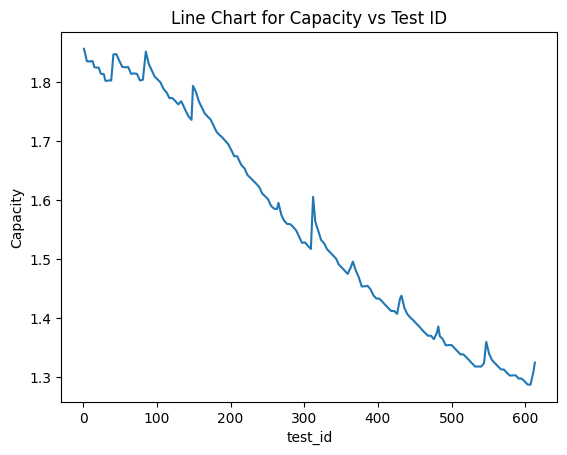

In [45]:
# battery discharge chart 

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Replace 'your_column_name' with the actual column name you want to visualize
sns.lineplot(x='test_id', y='Capacity', data=battery_b0005_df)

# Optionally, add labels and a title

plt.ylabel('Capacity')
plt.title('Line Chart for Capacity vs Test ID')

# Show the plot
plt.show()

In [68]:
combined_df=pd.DataFrame()

# Iterate through each row in the DataFrame
for index, row in battery_b0005_df.iterrows():
    # Load data from each file into a temporary DataFrame
    file_path = f'Data\cleaned_dataset\data\{row["filename"]}'  # Replace with the actual path
    temp_df = pd.read_csv(file_path)  # Adjust parameters based on your file format
    print(row['test_id'])
    temp_df['test_id'] = row['test_id']
    # Merge the original DataFrame with the temporary DataFrame based on a common key
    combined_row = pd.merge(battery_b0005_df, temp_df, left_on='test_id', right_on='test_id', how='inner')
    
    # Append the combined row to the main DataFrame
    # Append the combined row to the main DataFrame
    combined_df = pd.concat([combined_df, combined_row], ignore_index=True)
    


combined_df

# Now, 'combined_df' contains the combined data from all files


53
1
3
93
109
139
161
17
26
28
189
193
197
339
359
436
213
215
201
205
484
504
524
551
571
269
297
289
309
81
101
113
117
5
30
181
185
319
209
520
591
595
45
239
312
323
7
9
11
13
15
19
21
24
32
34
36
38
41
49
57
61
65
69
73
77
85
89
97
105
121
125
129
133
135
147
149
153
165
169
177
219
223
227
231
235
243
247
255
259
265
273
277
281
285
293
301
305
315
327
331
335
343
347
351
355
363
366
370
374
378
382
386
390
394
398
402
410
418
422
430
432
440
448
452
456
460
464
468
472
476
480
482
488
492
496
500
508
512
516
528
532
540
544
547
555
559
563
567
579
587
599
603
607
611
613
143
157
173
251
406
414
426
444
536
575
583
263


,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Voltage_measured,Current_measured,Temperature_measured,Current_load,Voltage_load,Time
0,discharge,2008-04-19 13:01:42,24,B0005,53,5174,05174.csv,1.825781,4.187344,-0.003803,24.216581,-0.0006,0.000,0.000
1,discharge,2008-04-19 13:01:42,24,B0005,53,5174,05174.csv,1.825781,4.186721,0.002225,24.218353,-0.0006,4.202,16.750
2,discharge,2008-04-19 13:01:42,24,B0005,53,5174,05174.csv,1.825781,3.986184,-2.012411,24.289186,-1.9982,3.050,35.703
3,discharge,2008-04-19 13:01:42,24,B0005,53,5174,05174.csv,1.825781,3.965250,-2.011242,24.454209,-1.9982,3.019,53.907
4,discharge,2008-04-19 13:01:42,24,B0005,53,5174,05174.csv,1.825781,3.949541,-2.012502,24.625189,-1.9982,3.000,72.047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50280,discharge,2008-05-05 11:41:31,24,B0005,263,5384,05384.csv,1.584943,3.495596,-0.001398,36.208806,0.0006,0.000,3082.563
50281,discharge,2008-05-05 11:41:31,24,B0005,263,5384,05384.csv,1.584943,3.501036,0.001319,36.031718,0.0006,0.000,3092.344
50282,discharge,2008-05-05 11:41:31,24,B0005,263,5384,05384.csv,1.584943,3.506238,0.001691,35.896051,0.0006,0.000,3102.125
50283,discharge,2008-05-05 11:41:31,24,B0005,263,5384,05384.csv,1.584943,3.511142,0.001461,35.785680,0.0006,0.000,3111.891


In [61]:
battery_b0005_df.iloc[0]

type                             discharge
start_time             2008-04-19 13:01:42
ambient_temperature                     24
battery_id                           B0005
test_id                                 53
uid                                   5174
filename                         05174.csv
Capacity                          1.825781
Name: 5120, dtype: object

In [51]:
discharge_df.shape

(2769, 8)

In [72]:
sorted(combined_df['test_id'].unique())

[1,
 3,
 5,
 7,
 9,
 11,
 13,
 15,
 17,
 19,
 21,
 24,
 26,
 28,
 30,
 32,
 34,
 36,
 38,
 41,
 45,
 49,
 53,
 57,
 61,
 65,
 69,
 73,
 77,
 81,
 85,
 89,
 93,
 97,
 101,
 105,
 109,
 113,
 117,
 121,
 125,
 129,
 133,
 135,
 139,
 143,
 147,
 149,
 153,
 157,
 161,
 165,
 169,
 173,
 177,
 181,
 185,
 189,
 193,
 197,
 201,
 205,
 209,
 213,
 215,
 219,
 223,
 227,
 231,
 235,
 239,
 243,
 247,
 251,
 255,
 259,
 263,
 265,
 269,
 273,
 277,
 281,
 285,
 289,
 293,
 297,
 301,
 305,
 309,
 312,
 315,
 319,
 323,
 327,
 331,
 335,
 339,
 343,
 347,
 351,
 355,
 359,
 363,
 366,
 370,
 374,
 378,
 382,
 386,
 390,
 394,
 398,
 402,
 406,
 410,
 414,
 418,
 422,
 426,
 430,
 432,
 436,
 440,
 444,
 448,
 452,
 456,
 460,
 464,
 468,
 472,
 476,
 480,
 482,
 484,
 488,
 492,
 496,
 500,
 504,
 508,
 512,
 516,
 520,
 524,
 528,
 532,
 536,
 540,
 544,
 547,
 551,
 555,
 559,
 563,
 567,
 571,
 575,
 579,
 583,
 587,
 591,
 595,
 599,
 603,
 607,
 611,
 613]

In [73]:
sorted(battery_b0005_df['test_id'].unique())

[1,
 3,
 5,
 7,
 9,
 11,
 13,
 15,
 17,
 19,
 21,
 24,
 26,
 28,
 30,
 32,
 34,
 36,
 38,
 41,
 45,
 49,
 53,
 57,
 61,
 65,
 69,
 73,
 77,
 81,
 85,
 89,
 93,
 97,
 101,
 105,
 109,
 113,
 117,
 121,
 125,
 129,
 133,
 135,
 139,
 143,
 147,
 149,
 153,
 157,
 161,
 165,
 169,
 173,
 177,
 181,
 185,
 189,
 193,
 197,
 201,
 205,
 209,
 213,
 215,
 219,
 223,
 227,
 231,
 235,
 239,
 243,
 247,
 251,
 255,
 259,
 263,
 265,
 269,
 273,
 277,
 281,
 285,
 289,
 293,
 297,
 301,
 305,
 309,
 312,
 315,
 319,
 323,
 327,
 331,
 335,
 339,
 343,
 347,
 351,
 355,
 359,
 363,
 366,
 370,
 374,
 378,
 382,
 386,
 390,
 394,
 398,
 402,
 406,
 410,
 414,
 418,
 422,
 426,
 430,
 432,
 436,
 440,
 444,
 448,
 452,
 456,
 460,
 464,
 468,
 472,
 476,
 480,
 482,
 484,
 488,
 492,
 496,
 500,
 504,
 508,
 512,
 516,
 520,
 524,
 528,
 532,
 536,
 540,
 544,
 547,
 551,
 555,
 559,
 563,
 567,
 571,
 575,
 579,
 583,
 587,
 591,
 595,
 599,
 603,
 607,
 611,
 613]